In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

from LoadMultiFiles import LoadOneFileUproot
dir_evt = LoadOneFileUproot("root://junoeos01.ihep.ac.cn//eos/juno/valprod/valprod0/Atm/Atm/pi+/0_0_0/user-detsim-z_0_theta_0.00.root",
                            name_branch="evt")

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-v3c0vw9r because the default path (/afs/ihep.ac.cn/users/l/luoxj/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [13]:
dir_michael = LoadOneFileUproot("root://junoeos01.ihep.ac.cn//eos/juno/valprod/valprod0/Atm/Atm/pi+/0_0_0/user-detsim-z_0_theta_0.00.root",
                            name_branch="michael")

In [19]:
dir_nCapture = LoadOneFileUproot("root://junoeos01.ihep.ac.cn//eos/juno/valprod/valprod0/Atm/Atm/pi+/0_0_0/user-detsim-z_0_theta_0.00.root",
                                name_branch="nCapture")

In [42]:
dir_mu_tracking = LoadOneFileUproot("root://junoeos01.ihep.ac.cn//eos/juno/valprod/valprod0/Atm/Atm/pi+/0_0_0/user-detsim-z_0_theta_0.00.root",
                                    name_branch="mu_tracking",return_list=False)

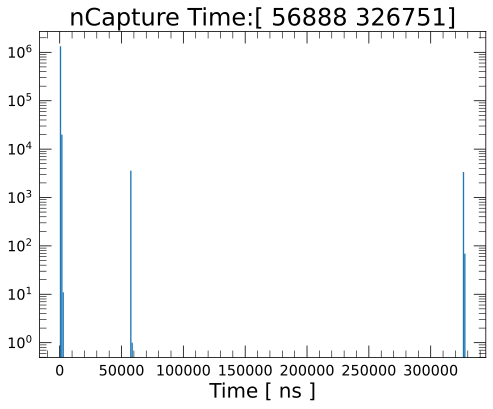

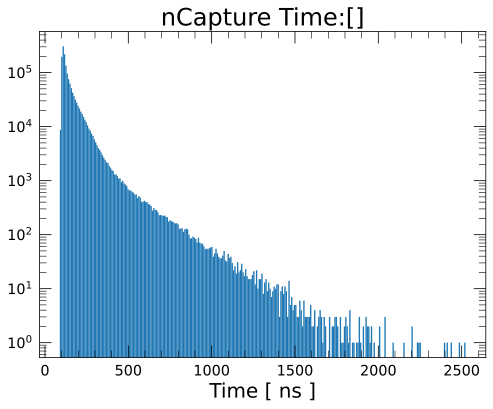

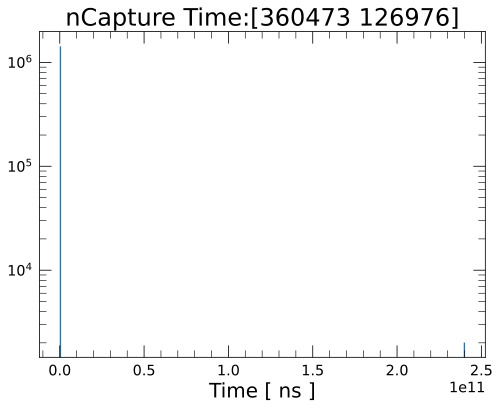

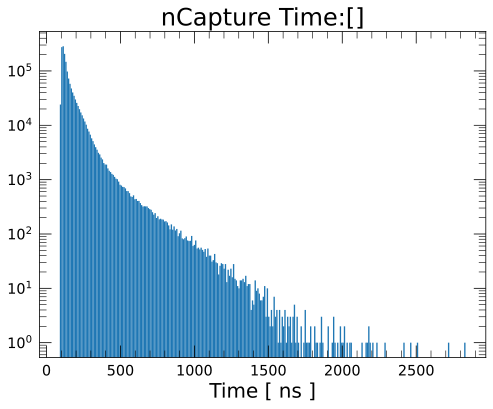

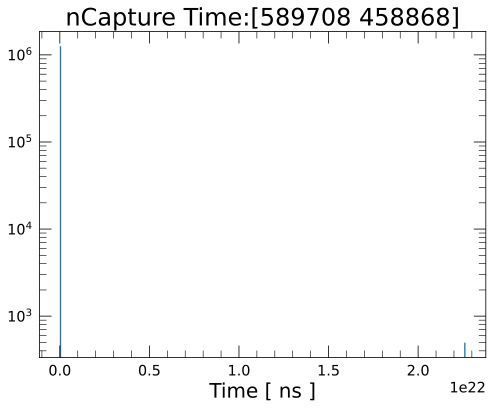

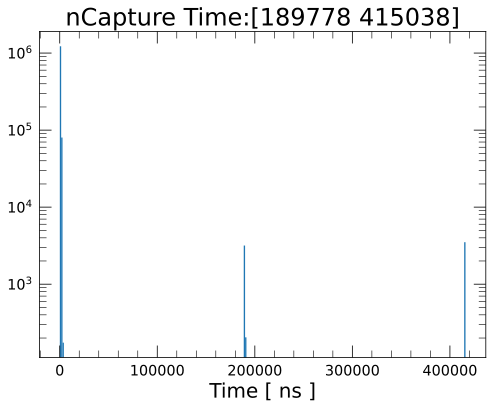

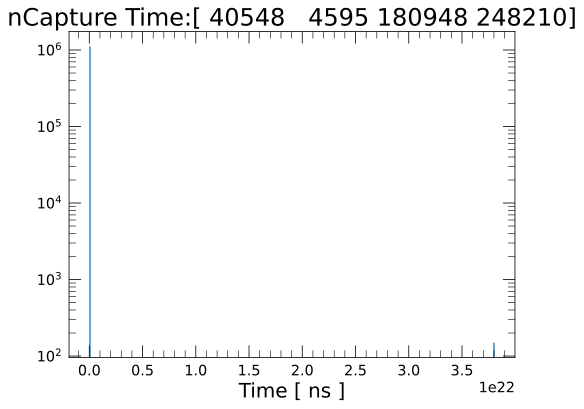

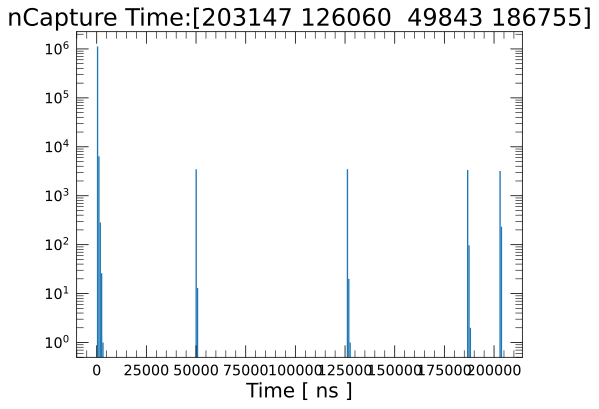

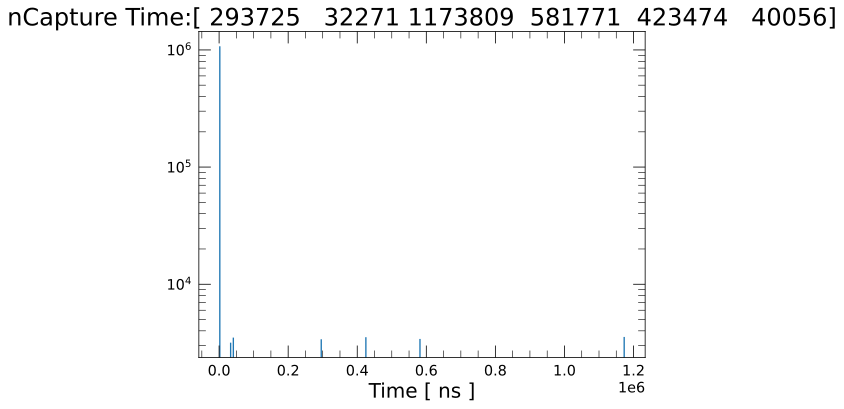

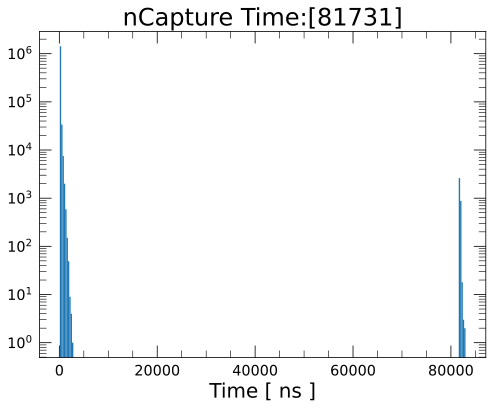

In [27]:
for i in range(10):
    plt.figure()
    plt.hist(dir_evt["hitTime"][i], bins=300)
    plt.title("nCapture Time:"+str(np.array(dir_nCapture["NeutronCaptureT"][i],dtype=int)))

    plt.semilogy()
    plt.xlabel("Time [ ns ]")

In [14]:
print(dir_michael)

{'evtID': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'pdgid': [array([-11], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([], dtype=int32), array([-11], dtype=int32), array([-11], dtype=int32), array([], dtype=int32), array([-11], dtype=int32), array([], dtype=int32)], 'kine': [array([51.425144], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([47.72684], dtype=float32), array([51.009064], dtype=float32), array([], dtype=float32), array([41.479244], dtype=float32), array([], dtype=float32)], 'px': [array([42.944504], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([37.73297], dtype=float32), array([-17.492144], dtype=float32), array([], dtype=float32), array([34.361275], dtype=float32), array([], dtype=float32)], 'py': [array([29.077], dtype=float32), array([], dtype=float32), array([], dtype=float

In [47]:
from collections import Counter
# print(dir_mu_tracking["pdgID"][dir_mu_tracking["evtID"]==0])
Counter(dir_mu_tracking["pdgID"][dir_mu_tracking["evtID"]==4])

Counter({211: 1,
         11: 1574,
         1000020040: 7,
         1000010030: 1,
         2212: 12,
         111: 2,
         22: 108,
         -11: 9,
         0: 5,
         2112: 7,
         1000060120: 3,
         1000040100: 1,
         -12: 1,
         1000050100: 2,
         1000010020: 2,
         1000040080: 1})

69.23972066805503


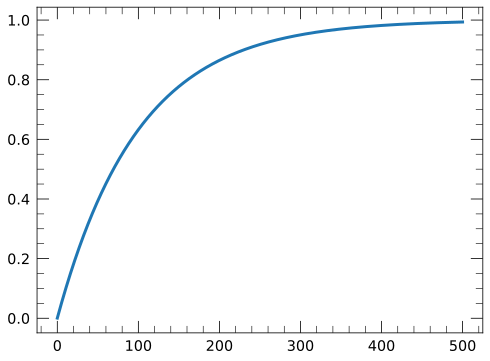

In [68]:
from scipy.interpolate import interp1d
x = np.linspace(0, 500, 10000)
# plt.plot(x, np.exp(-x))
tau = 100
plt.plot(x[:-1], 1/tau*np.cumsum(np.exp(-x[:-1]/100)*np.diff(x)))
f = interp1d( 1/tau*np.cumsum(np.exp(-x[:-1]/100)*np.diff(x)),x[:-1])
print(f(0.5))
# print(np.sum(np.exp(-x)))